# TMAA – Projeto #1
### Análise de Componentes Principais (PCA) para a Compressão de Imagens RGB

### Grupo 
- **Pedro Fonte Santa**, ppfsa1@iscte-iul.pt nº 105306  
- **Tiago Ferreira**, tmfaa@iscte-iul.pt, nº 37952  

---

📅 **Data de entrega:** 07 de Novembro

📊 **Objetivo:** 
O objetivo deste projeto é usar análise de componentes principais (PCA) para realizar e estudar a compressão de imagens. 

---

#### Dataset: eye_image.jpg

---

### (a) Importar e preparar a imagem

Carregar a imagem `eye_image.jpg` em tons de cinzento e redimensioná-la para 16×16. A matriz resultante vai chamar-se **X**.

In [1]:
# Importar os módulos necessários
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

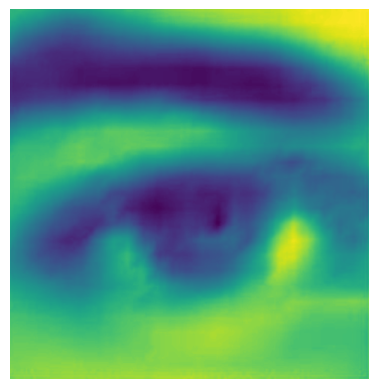

In [2]:
# Carregar a imagem eye image em grayscale
img = cv2.imread('eye_image.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar a imagem
plt.axis('off')
plt.imshow(img)

In [3]:
# Dimensões da matriz
height, width = img.shape[0], img.shape[1]
print(f'height: {height}, width: {width}')

height: 734, width: 712


In [4]:
# Criar matriz 16*16 a partir da imagem

# Mudar tamanho da imagem para 16*16
img2 = cv2.resize(img, (width // 44, height // 44), interpolation=cv2.INTER_LINEAR)

# Converter a imagem numa matriz X
X = np.array(img2)

# Mostrar a matriz
print(X, "\n")

# Mostrar as dimensões da matriz
print(f'height: {X.shape[0]}, width: {X.shape[1]}') # certificar que é 16*16

[[173 157 141 146 162 176 191 204 211 218 227 229 237 244 248 250]
 [131 114 106 112 120 127 132 136 141 152 158 166 187 208 227 237]
 [103  97  93  89  92  91  89  87  85  92  93 100 116 141 174 199]
 [ 97 100  97  97  95  96 102  95  91  89  86  85  94 106 127 159]
 [134 142 145 159 164 163 166 167 152 139 128 118 112 116 129 153]
 [178 187 192 201 206 207 203 201 196 184 170 159 151 153 161 176]
 [196 199 205 207 199 182 173 163 156 154 152 141 127 140 155 167]
 [198 193 179 156 144 127 109 105 104 105 109 124 138 131 133 141]
 [184 158 133 121 119  93  80  90  93  92 106 130 160 147 142 145]
 [159 130 113  98 131 131 102 100 107 108 122 161 227 193 151 149]
 [146 118 108 129 171 175 117 108 120 127 144 196 239 205 165 160]
 [158 143 135 145 172 186 154 130 131 141 172 203 216 192 171 178]
 [182 173 165 167 181 189 184 175 181 194 207 212 213 208 206 208]
 [199 194 190 189 197 204 209 211 217 222 223 218 212 205 202 201]
 [211 210 206 204 204 211 218 222 225 225 219 213 203 200 199 

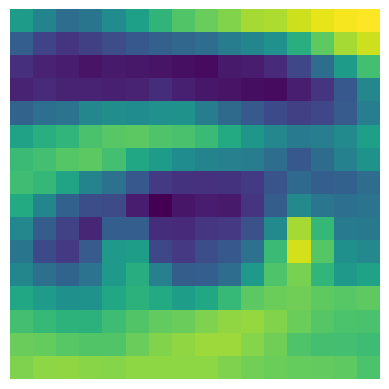

In [5]:
# Mostrar a matriz 16*16 em imagem
plt.axis('off')
plt.imshow(X)

### (b) Centrar os dados (remover a média de cada linha)

Tratar cada linha de **X** como um vetor em $ \mathbb{R}^{16} $.  
Calculamos o **vetor média** $ \boldsymbol{\mu} $ (média de todas as linhas de X) e subtraímos esse vetor a cada linha.  
O resultado é uma nova matriz **Y**, cujas linhas estão **centradas na origem**, exatamente o que se faz antes da decomposição SVD / PCA.

In [ ]:
# Calcular a média da matriz X 
muX = np.mean(X, axis = 0) # se cada linha é um vector de 16 componentes, cada coluna é um componente (média por coluna)

# Mostrar vector da média (matriz 1*16)
print(f"Vector da média: {muX}")

Vector da média: [166.625  158.5    151.875  152.5    161.     161.1875 153.125  150.9375
 151.9375 153.6875 158.125  166.6875 177.625  174.875  174.875  182.625 ]


In [7]:
# Definimos a matriz Y, igual a X mas com os valores médios subtraídos
Y = X - muX # continua a ser uma matriz 16*16 tal como X 

# Mostrar matriz centrada
print(f"Matriz Centrada Y: {Y}")

Matriz Centrada Y: [[ 6.37500e+00 -1.50000e+00 -1.08750e+01 -6.50000e+00  1.00000e+00
   1.48125e+01  3.78750e+01  5.30625e+01  5.90625e+01  6.43125e+01
   6.88750e+01  6.23125e+01  5.93750e+01  6.91250e+01  7.31250e+01
   6.73750e+01]
 [-3.56250e+01 -4.45000e+01 -4.58750e+01 -4.05000e+01 -4.10000e+01
  -3.41875e+01 -2.11250e+01 -1.49375e+01 -1.09375e+01 -1.68750e+00
  -1.25000e-01 -6.87500e-01  9.37500e+00  3.31250e+01  5.21250e+01
   5.43750e+01]
 [-6.36250e+01 -6.15000e+01 -5.88750e+01 -6.35000e+01 -6.90000e+01
  -7.01875e+01 -6.41250e+01 -6.39375e+01 -6.69375e+01 -6.16875e+01
  -6.51250e+01 -6.66875e+01 -6.16250e+01 -3.38750e+01 -8.75000e-01
   1.63750e+01]
 [-6.96250e+01 -5.85000e+01 -5.48750e+01 -5.55000e+01 -6.60000e+01
  -6.51875e+01 -5.11250e+01 -5.59375e+01 -6.09375e+01 -6.46875e+01
  -7.21250e+01 -8.16875e+01 -8.36250e+01 -6.88750e+01 -4.78750e+01
  -2.36250e+01]
 [-3.26250e+01 -1.65000e+01 -6.87500e+00  6.50000e+00  3.00000e+00
   1.81250e+00  1.28750e+01  1.60625e+01  6.25

### (c) Decomposição em Valores Singulares (SVD) e construção das matrizes de descodificação

Vamos:
1. aplicar a SVD à matriz centrada $Y$, obtendo $Y = U \Sigma V^T$;
2. usar as **primeiras colunas de** $V$ (i.e. de `Vt.T`) para construir as **matrizes de descodificação** $D_i$, para $i = 2, 5, 10$.

Como em PCA as direções principais são dadas pelos **vetores singulares direitos** (colunas de $V$),  
a matriz de descodificação com $i$ componentes principais é simplesmente:

$$
D_i = V_{[:,\,0:i]}
$$

Cada $D_i$ terá dimensão $16 \times i$ porque temos 16 features (a imagem foi reduzida para $16\times16$).

In [8]:
# Decomposição de Valores Singulares (SVD)
U, S, Vt = np.linalg.svd(Y)

# Mostrar SVD
print("Decomposição de Valores Singulares (U, S, Vt):")
print("U:", U)
print("S:", S)
print("Vt:", Vt)

Decomposição de Valores Singulares (U, S, Vt):
U: [[-0.2609955  -0.41336455  0.24335132 -0.19189554 -0.18197833 -0.00264008
   0.13715677 -0.34190287  0.05176059  0.29433137  0.11493724 -0.09624987
   0.29356214 -0.48236826  0.05470012  0.25      ]
 [ 0.08214382 -0.37646081  0.31048126 -0.2192995   0.23827804  0.24030833
   0.04661941 -0.02284994 -0.04147061 -0.25771006  0.23399447  0.36141165
  -0.05841247  0.41219315  0.31701337  0.25      ]
 [ 0.3863448  -0.10696164  0.34101303 -0.14890728  0.28920425  0.08409146
  -0.12852897  0.14853297  0.0661762   0.28617265 -0.50631154 -0.13011275
  -0.27120904 -0.11437078 -0.25070227  0.25      ]
 [ 0.41553654  0.10893317  0.3303318   0.14762583 -0.22226481 -0.25490654
  -0.14829645  0.27703063  0.07923268 -0.31747746  0.45543925 -0.16528846
   0.10091715 -0.22521091 -0.07883208  0.25      ]
 [ 0.10323465  0.31051199  0.27579065  0.40609461 -0.27196596  0.05293682
   0.15857664 -0.34110448  0.0603001  -0.09061633 -0.44044692  0.17425867
   0.2

In [ ]:
# Obter os loadings (componentes principais como colunas) através de V 
V = Vt.T # cada coluna é um componente principal, matriz 16*16 (Vt era matriz 16*16)

# Mostrar componentes principais
print(f"Matriz Componentes Principais: {V}")

Matriz Componentes Principais: [[-0.18151243  0.15056232 -0.38043321 -0.43078264 -0.11753597 -0.00623367
   0.21785261 -0.29337303 -0.28490713  0.2578756   0.11452236  0.43632574
  -0.31450199  0.10586825 -0.07264657  0.01164153]
 [-0.20416517  0.27762089 -0.22743883 -0.38577108 -0.0532838  -0.07648079
  -0.21759125 -0.04432908  0.27723576  0.23771943  0.07315163 -0.27163141
   0.6086663   0.05077475 -0.15548279 -0.11385676]
 [-0.22148046  0.34021801 -0.13480277 -0.26417231  0.13712431  0.05124696
  -0.43682765  0.31315087 -0.04177714 -0.19872728 -0.29715299 -0.1460235
  -0.39995119 -0.27037742  0.19902697  0.1157189 ]
 [-0.23875605  0.30956192 -0.05887032  0.0100432   0.34275406  0.08006063
   0.36766132  0.02461337  0.26205665 -0.51663106  0.36555307  0.10704498
   0.07130432  0.18757089  0.2509826   0.0011191 ]
 [-0.2402404   0.16776288 -0.17471719  0.30709782  0.31962468  0.22506796
   0.35038044 -0.09767086 -0.37832478  0.17415787 -0.22834821 -0.40585027
   0.09226923 -0.07327977 

In [10]:
# Matrizes de descodificação Di (i = número de componentes principais) resultam em matrizes 16*i
# como as colunas já estão automaticamente ordenadas por ordem descrescente de importância, é só obter o número de i pretendidos

# i = 2
d2  = V[:, :2] # matriz 16*2

# i = 5
d5  = V[:, :5] # matriz 16*5

# i = 10
d10 = V[:, :10] # matriz 16*10

# Mostrar matrizes de descodificação
print("\nMatriz de descodificação (d2) para duas componentes principais:\n", d2)
print("\nMatriz de descodificação (d5) para cinco componentes principais:\n", d5)
print("\nMatriz de descodificação (d10) para dez componentes principais:\n", d10)


Matriz de descodificação (d2) para duas componentes principais:
 [[-0.18151243  0.15056232]
 [-0.20416517  0.27762089]
 [-0.22148046  0.34021801]
 [-0.23875605  0.30956192]
 [-0.2402404   0.16776288]
 [-0.27378046  0.07623891]
 [-0.3092923   0.11759269]
 [-0.31768841  0.10337758]
 [-0.3266536   0.03265268]
 [-0.32705943 -0.04694216]
 [-0.31396651 -0.14811553]
 [-0.26461348 -0.2877788 ]
 [-0.18786649 -0.45097192]
 [-0.1807193  -0.40249231]
 [-0.16234027 -0.30605871]
 [-0.11610157 -0.25127028]]

Matriz de descodificação (d5) para cinco componentes principais:
 [[-0.18151243  0.15056232 -0.38043321 -0.43078264 -0.11753597]
 [-0.20416517  0.27762089 -0.22743883 -0.38577108 -0.0532838 ]
 [-0.22148046  0.34021801 -0.13480277 -0.26417231  0.13712431]
 [-0.23875605  0.30956192 -0.05887032  0.0100432   0.34275406]
 [-0.2402404   0.16776288 -0.17471719  0.30709782  0.31962468]
 [-0.27378046  0.07623891 -0.09019733  0.47384881  0.31086235]
 [-0.3092923   0.11759269  0.23216793  0.21291903 -0.039

In [11]:
# Verificar ortogonalidade pois garante que as componentes capturam variância independente e não redundante, adicionando informação nova
# O que queremos obter é um resultado o mais próximo da matriz identidade (Dit.Di = I)

# Verificar ortogonalidade de d2
orthogonality_d2 = np.dot(d2.T, d2)
print("\nVerificar ortogonalidade de d2:", np.round(orthogonality_d2,6))

# Verificar ortogonalidade de d5
orthogonality_d5 = np.dot(d5.T, d5)
print("\nVerificar ortogonalidade de d5:", np.round(orthogonality_d5,6))

# Verificar ortogonalidade de d10
orthogonality_d10 = np.dot(d10.T, d10)
print("\nVerificar ortogonalidade de d10:", np.round(orthogonality_d10,6))


Verificar ortogonalidade de d2: [[ 1. -0.]
 [-0.  1.]]

Verificar ortogonalidade de d5: [[ 1. -0. -0. -0.  0.]
 [-0.  1.  0. -0.  0.]
 [-0.  0.  1. -0.  0.]
 [-0. -0. -0.  1. -0.]
 [ 0.  0.  0. -0.  1.]]

Verificar ortogonalidade de d10: [[ 1. -0. -0. -0.  0. -0. -0.  0.  0. -0.]
 [-0.  1.  0. -0.  0.  0.  0. -0. -0.  0.]
 [-0.  0.  1. -0.  0. -0.  0. -0.  0.  0.]
 [-0. -0. -0.  1. -0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0. -0.  1. -0. -0.  0. -0. -0.]
 [-0.  0. -0. -0. -0.  1. -0.  0. -0. -0.]
 [-0.  0.  0.  0. -0. -0.  1. -0. -0.  0.]
 [ 0. -0. -0.  0.  0.  0. -0.  1. -0.  0.]
 [ 0. -0.  0.  0. -0. -0. -0. -0.  1. -0.]
 [-0.  0.  0.  0. -0. -0.  0.  0. -0.  1.]]


### (d) Codificação com $i$ componentes principais

Vamos **codificar** (ou projetar) os dados centrados $Y$ no subespaço gerado pelas primeiras $i$ componentes principais.  

Isto faz-se multiplicando a transposta de $Y$ à esquerda pela matriz de codificação $D_i^T$, ou seja:

$$
Z_i = D_i^T Y^T
$$

O resultado $Z_i$ representa a **versão comprimida** da imagem, expressa em apenas $i$ componentes principais (em vez das 16 originais).  
Neste caso, com $i = 2$.

In [12]:
# Dados codificados (usando duas componentes principais), multiplicando Y.T à esquerda por d2.T:
c2 = np.dot(d2.T, Y.T) # matriz 2*16 x matriz 16*16 = matriz 2*16

# Mostrar c2
print(f"Matriz codificada com duas componentes : {c2}")

Matriz codificada com duas componentes : [[-151.53820849   47.69403297  224.31804085  241.26723721   59.93971107
   -97.05807361  -35.04046997  107.40928655  162.93929398  113.98867654
    49.06516542   -4.91093585 -112.37753366 -182.99624413 -202.91206522
  -219.78791366]
 [-117.06498167 -106.61382826  -30.29157202   30.8499102    87.93710017
    87.56427179  117.45137447   88.30300971   17.09453738  -63.91044414
   -79.73651882  -46.43290493  -39.52200342   -4.92122245   25.46409385
    33.82917813]]


### (e) Descodificar, multiplicando à esquerda pela matriz $D_i$. Chamar $Y_i^T$  à matriz obtida (também deverá ser 16 × 16).

In [13]:
# Dados descodificados (usando duas componentes principais) ao multiplicar c2 à esquerda por d2 (obter Y2t)
Y2t = np.dot(d2, c2) # matriz 16*2 x matriz 2*16 = matriz 16*16

# Mostrar Y2t
print(f"Matriz descodificada transposta com duas componentes : {Y2t}")

Matriz descodificada transposta com duas componentes : [[ 9.88049404e+00 -2.47090853e+01 -4.52772831e+01 -3.91481697e+01
   2.36021087e+00  3.08011271e+01  2.40440324e+01 -6.20101517e+00
  -2.70017148e+01 -3.03128669e+01 -2.09112529e+01 -6.09964994e+00
   1.44473953e+01  3.24751432e+01  4.06649961e+01  4.49876389e+01]
 [-1.56085937e+00 -3.93356858e+01 -5.42075045e+01 -4.06937877e+01
   1.21755741e+01  4.41255490e+01  3.97609981e+01  2.58552421e+00
  -2.85207285e+01 -4.10153919e+01 -3.21539209e+01 -1.18881021e+01
   1.19714450e+01  3.59952256e+01  4.84969411e+01  5.42647237e+01]
 [-6.26486264e+00 -4.68352414e+01 -5.99878024e+01 -4.29402846e+01
   1.66423104e+01  5.12874098e+01  4.77198528e+01  6.25321583e+00
  -3.02720010e+01 -4.69897494e+01 -3.79947756e+01 -1.47096343e+01
   1.14433309e+01  3.88558046e+01  5.36044019e+01  6.01880250e+01]
 [-5.81962895e-02 -4.43908203e+01 -6.29344066e+01 -4.80540552e+01
   1.29110088e+01  5.02797664e+01  4.47245971e+01  1.69063215e+00
  -3.36109245e+01 

### (f) Repor o vetor média e reconstruir a imagem

Nesta etapa vamos transpor a matriz reconstruída no espaço centrado e **voltar a somar o vetor média** μ a todas as suas linhas, obtendo assim a imagem “reconstruída” **Xᵢ**.

Em termos matemáticos:

$Xᵢ = Yᵢᵀ + μ$

In [ ]:
# Transpor Y2t para obter Y2
Y2 = Y2t.T # matriz 16*16 transposta = matriz 16*16

# Mostrar matriz descodificada
print(f"Matriz descodificada com duas componentes : {Y2}")

Matriz descodificada com duas componentes : [[ 9.88049404e+00 -1.56085937e+00 -6.26486264e+00 -5.81962895e-02
   1.67664417e+01  3.25632943e+01  3.31036143e+01  3.60400378e+01
   4.56780160e+01  5.50572831e+01  6.49170639e+01  7.37878720e+01
   8.12619702e+01  7.45036344e+01  6.04295118e+01  4.70087747e+01]
 [-2.47090853e+01 -3.93356858e+01 -4.68352414e+01 -4.43908203e+01
  -2.93438762e+01 -2.11858167e+01 -2.72884043e+01 -2.61733206e+01
  -1.90606550e+01 -1.05941003e+01  8.16834794e-01  1.80607154e+01
   3.91197324e+01  3.42920134e+01  2.48874290e+01  2.12515350e+01]
 [-4.52772831e+01 -5.42075045e+01 -5.99878024e+01 -6.29344066e+01
  -5.89720573e+01 -6.37232939e+01 -7.29419100e+01 -7.43947103e+01
  -7.42633968e+01 -7.19433793e+01 -6.59416995e+01 -5.06403047e+01
  -2.84811937e+01 -2.83464755e+01 -2.71448522e+01 -1.84323040e+01]
 [-3.91481697e+01 -4.06937877e+01 -4.29402846e+01 -4.80540552e+01
  -5.27866681e+01 -6.37022926e+01 -7.09943743e+01 -7.34586152e+01
  -7.78034795e+01 -8.03568869

In [ ]:
# Obter imagem reconstruída X2 (somar média X)
X2 = Y2 + muX # matriz 16*16

# Mostrar matriz reconstruída
print(f"Matriz reconstruída com duas componentes : {X2}")

Matriz reconstruída com duas componentes : [[176.50549404 156.93914063 145.61013736 152.44180371 177.76644175
  193.75079429 186.22861426 186.97753782 197.61551596 208.74478313
  223.04206388 240.47537201 258.88697016 249.37863435 235.3045118
  229.63377467]
 [141.91591468 119.16431416 105.0397586  108.10917974 131.65612377
  140.00168327 125.83659567 124.76417939 132.87684504 143.09339975
  158.94183479 184.74821538 216.74473237 209.16701341 199.76242896
  203.87653505]
 [121.34771687 104.29249547  91.88719764  89.56559335 102.02794267
   97.46420614  80.18309003  76.5427897   77.67410316  81.74412074
   92.1833005  116.04719529 149.14380632 146.52852447 147.73014785
  164.192696  ]
 [127.47683035 117.80621228 108.93471536 104.44594477 108.21333194
   97.48520735  82.13062573  77.47888481  74.13402046  73.33061315
   77.80581745  93.96698726 118.38652878 118.85650116 126.26572724
  146.8618301 ]
 [168.98521087 170.67557414 168.51731044 165.41100885 161.35264077
  151.48140689 144.9268

### (g) Repetir os passos (d)–(f) para $i = 5$ e $i = 10$

Nesta etapa vamos repetir o processo de **codificação, descodificação e reconstrução** da imagem para **$i = 5$** e **$i = 10$** componentes principais.  

O objetivo é comparar as imagens reconstruídas para diferentes números de componentes e observar como aumenta a qualidade da reconstrução à medida que usamos mais componentes principais.

#### Passo d) $i = 5$

In [16]:
# Dados codificados (usando cinco componentes principais), multiplicando Y.T à esquerda por d5.T:
c5 = np.dot(d5.T, Y.T) # matriz 5*16 x matriz 16*16 = matriz 5*16

# Mostrar c5
print(f"Matriz codificada com cinco componentes : {c5}")

Matriz codificada com cinco componentes : [[-1.51538208e+02  4.76940330e+01  2.24318041e+02  2.41267237e+02
   5.99397111e+01 -9.70580736e+01 -3.50404700e+01  1.07409287e+02
   1.62939294e+02  1.13988677e+02  4.90651654e+01 -4.91093585e+00
  -1.12377534e+02 -1.82996244e+02 -2.02912065e+02 -2.19787914e+02]
 [-1.17064982e+02 -1.06613828e+02 -3.02915720e+01  3.08499102e+01
   8.79371002e+01  8.75642718e+01  1.17451374e+02  8.83030097e+01
   1.70945374e+01 -6.39104441e+01 -7.97365188e+01 -4.64329049e+01
  -3.95220034e+01 -4.92122245e+00  2.54640939e+01  3.38291781e+01]
 [ 4.26312443e+01  5.43913317e+01  5.97400076e+01  5.78688285e+01
   4.83140945e+01  2.37483954e+01 -5.80408371e+00 -5.50889764e+01
  -5.31590732e+01 -6.58986543e+01 -6.46561857e+01 -3.90272325e+01
  -1.39884242e+00  5.34652775e+00  3.63855934e+00 -1.06459410e+01]
 [-2.19840141e+01 -2.51234772e+01 -1.70591758e+01  1.69123696e+01
   4.65231737e+01  2.71157184e+01 -8.92785910e+00 -4.34542922e+01
  -4.51238590e+01  9.77808798e+

#### Passo e) $i = 5$

In [17]:
# Dados descodificados (usando cinco componentes principais) ao multiplicar c5 à esquerda por d5 (obter Y5t)
Y5t = np.dot(d5, c5) # matriz 16*5 x matriz 5*16 = matriz 16*16

# Mostrar Y5t
print(f"Matriz descodificada transposta com cinco componentes : {Y5t}")

Matriz descodificada transposta com cinco componentes : [[  4.36956075 -36.19839467 -62.62156031 -66.938008   -34.21264446
   10.06719879  27.07076654  33.04177522  14.34415976  -6.81101046
  -20.52120934  -9.15445826  15.65038123  33.19889897  44.66988979
   54.04465444]
 [ -2.21524616 -42.74879562 -62.10502838 -59.69473891 -15.92208354
   28.25549946  43.15278527  31.6814472    1.74053368 -28.60092783
  -38.5014185  -18.12485214  13.21270303  36.5074747   51.76574372
   61.59690402]
 [ -7.64735013 -45.64066592 -61.24071954 -56.97169472  -4.31762257
   40.94415247  54.39257556  25.6653933  -13.14998223 -43.77423128
  -41.60745827 -16.72976962  13.34096203  36.84206831  53.4815422
   66.41280041]
 [ -6.39621767 -43.12158044 -60.88949885 -55.6971083    5.14256353
   49.20729554  53.80471779   5.76363378 -35.84492181 -50.73252922
  -27.93752677  -4.47754883  16.77214514  36.93885023  51.21556978
   66.25215609]
 [ -0.79728978 -42.1574994  -69.30222757 -61.81241435   1.17090141
   42.2349

#### Passo f) $i = 5$

In [ ]:
# Transpor Y5t para obter Y5
Y5 = Y5t.T # matriz 16*16 transposta = matriz 16*16

# Mostrar matriz descodificada
print(f"Matriz descodificada com cinco componentes : {Y5}")

Matriz descodificada com cinco componentes : [[  4.36956075  -2.21524616  -7.64735013  -6.39621767  -0.79728978
   15.02911739  38.7324707   50.86083372  58.85317021  66.79879994
   68.55495653  61.34459744  60.34882545  69.54130899  73.93086143
   65.65165307]
 [-36.19839467 -42.74879562 -45.64066592 -43.12158044 -42.1574994
  -33.71241345 -20.54929413 -16.98781744 -12.61041403  -1.22035697
    4.27389515   3.53873365   7.2814874   29.87502934  50.57345824
   54.96618251]
 [-62.62156031 -62.10502838 -61.24071954 -60.88949885 -69.30222757
  -71.99544686 -63.35928059 -64.28973703 -67.59176349 -62.37206205
  -62.50885471 -65.5693209  -62.51986671 -34.08838126  -1.97462877
   16.2911882 ]
 [-66.938008   -59.69473891 -56.97169472 -55.6971083  -61.81241435
  -64.9041789  -53.45483632 -51.22414568 -59.59866099 -66.49666921
  -76.76956248 -85.3050145  -82.35932967 -67.1611197  -45.73673591
  -22.914575  ]
 [-34.21264446 -15.92208354  -4.31762257   5.14256353   1.17090141
    3.09128159  13.54

In [19]:
# Obter imagem reconstruída X5 (somar média X)
X5 = Y5 + muX # matriz 16*16

# Mostrar matriz reconstruída
print(f"Matriz reconstruída com cinco componentes : {X5}")

Matriz reconstruída com cinco componentes : [[170.99456075 156.28475384 144.22764987 146.10378233 160.20271022
  176.21661739 191.8574707  201.79833372 210.79067021 220.48629994
  226.67995653 228.03209744 237.97382545 244.41630899 248.80586143
  248.27665307]
 [130.42660533 115.75120438 106.23433408 109.37841956 118.8425006
  127.47508655 132.57570587 133.94968256 139.32708597 152.46714303
  162.39889515 170.22623365 184.9064874  204.75002934 225.44845824
  237.59118251]
 [104.00343969  96.39497162  90.63428046  91.61050115  91.69777243
   89.19205314  89.76571941  86.64776297  84.34573651  91.31543795
   95.61614529 101.1181791  115.10513329 140.78661874 172.90037123
  198.9161882 ]
 [ 99.686992    98.80526109  94.90330528  96.8028917   99.18758565
   96.2833211   99.67016368  99.71335432  92.33883901  87.19083079
   81.35543752  81.3824855   95.26567033 107.7138803  129.13826409
  159.710425  ]
 [132.41235554 142.57791646 147.55737743 157.64256353 162.17090141
  164.27878159 166.665

#### Passo d) $i = 10$

In [20]:
# Dados codificados (usando dez componentes principais), multiplicando Y.T à esquerda por d10.T:
c10 = np.dot(d10.T, Y.T) # matriz 10*16 x matriz 16*16 = matriz 10*16

# Mostrar c10
print(f"Matriz codificada com dez componentes : {c10}")

Matriz codificada com dez componentes : [[-1.51538208e+02  4.76940330e+01  2.24318041e+02  2.41267237e+02
   5.99397111e+01 -9.70580736e+01 -3.50404700e+01  1.07409287e+02
   1.62939294e+02  1.13988677e+02  4.90651654e+01 -4.91093585e+00
  -1.12377534e+02 -1.82996244e+02 -2.02912065e+02 -2.19787914e+02]
 [-1.17064982e+02 -1.06613828e+02 -3.02915720e+01  3.08499102e+01
   8.79371002e+01  8.75642718e+01  1.17451374e+02  8.83030097e+01
   1.70945374e+01 -6.39104441e+01 -7.97365188e+01 -4.64329049e+01
  -3.95220034e+01 -4.92122245e+00  2.54640939e+01  3.38291781e+01]
 [ 4.26312443e+01  5.43913317e+01  5.97400076e+01  5.78688285e+01
   4.83140945e+01  2.37483954e+01 -5.80408371e+00 -5.50889764e+01
  -5.31590732e+01 -6.58986543e+01 -6.46561857e+01 -3.90272325e+01
  -1.39884242e+00  5.34652775e+00  3.63855934e+00 -1.06459410e+01]
 [-2.19840141e+01 -2.51234772e+01 -1.70591758e+01  1.69123696e+01
   4.65231737e+01  2.71157184e+01 -8.92785910e+00 -4.34542922e+01
  -4.51238590e+01  9.77808798e+00

#### Passo e) $i = 10$

In [21]:
# Dados descodificados (usando dez componentes principais) ao multiplicar c10 à esquerda por d10 (obter Y10t)
Y10t = np.dot(d10, c10) # matriz 16*10 x matriz 10*16 = matriz 16*16

# Mostrar Y10t
print(f"Matriz descodificada transposta com dez componentes : {Y10t}")

Matriz descodificada transposta com dez componentes : [[  6.77875769 -36.3541111  -63.4033847  -69.472331   -32.50810009
   11.2466836   29.27579975  31.38356613  17.41371764  -7.69190135
  -20.49440884  -8.98829732  15.91947116  32.5718487   43.30675527
   51.01593445]
 [ -1.96469152 -44.14581506 -61.13437585 -58.90642048 -16.59828928
   28.52849406  40.5726381   34.23993522  -0.39548632 -28.40492988
  -40.69758454 -15.00167691  13.58504948  35.97717343  52.25155428
   62.09442528]
 [-10.79706875 -45.33488123 -59.7652105  -54.44947355  -6.97679476
   40.41365776  53.09297729  27.47434215 -19.01854123 -38.94320292
  -43.79851171 -17.07094669  13.69051149  37.28649924  54.32505357
   69.87158983]
 [ -6.50928214 -41.18889598 -62.58875094 -55.98883488   6.89975519
   47.92314041  54.5074184    3.24020435 -31.45106896 -54.42121616
  -23.48381838  -7.56231882  14.50580936  36.82911964  51.46935004
   67.81938887]
 [  0.85222964 -40.16041404 -69.63787194 -65.89733897   2.85391293
   45.17420

#### Passo f) $i = 10$

In [ ]:
# Transpor Y10t para obter Y10
Y10 = Y10t.T # matriz 16*16 transposta = matriz 16*16

# Mostrar matriz descodificada
print(f"Matriz descodificada com dez componentes : {Y10}")

Matriz descodificada com dez componentes : [[  6.77875769  -1.96469152 -10.79706875  -6.50928214   0.85222964
   14.94664819  38.07138833  53.13357716  58.8240313   64.5047131
   68.69380587  62.25747893  59.71361507  68.41385234  73.74591969
   67.13880455]
 [-36.3541111  -44.14581506 -45.33488123 -41.18889598 -40.16041404
  -34.68049169 -21.4615967  -14.72963843 -10.71225984  -2.13870474
    0.14219313  -0.3531437    9.16997768  33.1848155   52.27260434
   54.2165066 ]
 [-63.4033847  -61.13437585 -59.7652105  -62.58875094 -69.63787194
  -69.98632699 -63.76954852 -64.60311942 -66.64088969 -61.47939834
  -65.17053883 -67.17366116 -61.4577458  -33.4393307   -1.71037324
   16.95950828]
 [-69.472331   -58.90642048 -54.44947355 -55.98883488 -65.89733897
  -65.00903168 -51.36178938 -55.11552581 -61.81310594 -64.36125885
  -72.24766926 -81.47012477 -83.70373123 -69.26739948 -47.03168191
  -24.26730909]
 [-32.50810009 -16.59828928  -6.97679476   6.89975519   2.85391293
    1.65102046  13.1795

In [ ]:
# Obter imagem reconstruída X10
X10 = Y10 + muX # matriz 16*16

# Mostrar matriz reconstruída
print(f"Matriz reconstruída com dez componentes : {X10}")

Matriz reconstruída com dez componentes : [[173.40375769 156.53530848 141.07793125 145.99071786 161.85222964
  176.13414819 191.19638833 204.07107716 210.7615313  218.1922131
  226.81880587 228.94497893 237.33861507 243.28885234 248.62091969
  249.76380455]
 [130.2708889  114.35418494 106.54011877 111.31110402 120.83958596
  126.50700831 131.6634033  136.20786157 141.22524016 151.54879526
  158.26719313 166.3343563  186.79497768 208.0598155  227.14760434
  236.8415066 ]
 [103.2216153   97.36562415  92.1097895   89.91124906  91.36212806
   91.20117301  89.35545148  86.33438058  85.29661031  92.20810166
   92.95446117  99.51383884 116.1672542  141.4356693  173.16462676
  199.58450828]
 [ 97.152669    99.59357952  97.42552645  96.51116512  95.10266103
   96.17846832 101.76321062  95.82197419  90.12439406  89.32624115
   85.87733074  85.21737523  93.92126877 105.60760052 127.84331809
  158.35769091]
 [134.11689991 141.90171072 144.89820524 159.39975519 163.85391293
  162.83852046 166.30453

### **Visualização das imagens reconstruídas**

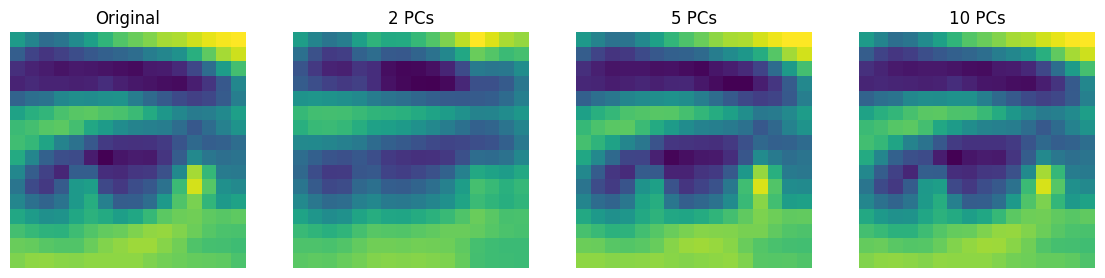

In [24]:
# Mostrar visulamente a matriz original e as reconstruídas após compressão com diferentes componentes principais

plt.figure(figsize=(14,6))

# Matriz original
plt.subplot(1,4,1)
plt.imshow(X)
plt.title("Original")
plt.axis('off')

# Matriz reconstruída com duas componentes principais
plt.subplot(1,4,2)
plt.imshow(X2)
plt.title("2 PCs")
plt.axis('off')

# Matriz reconstruída com cinco componentes principais
plt.subplot(1,4,3)
plt.imshow(X5)
plt.title("5 PCs")
plt.axis('off')

# Matriz reconstruída com dez componentes principais
plt.subplot(1,4,4)
plt.imshow(X10)
plt.title("10 PCs")
plt.axis('off')

# Mostrar todas
plt.show()

### (h) Erro de reconstrução com a norma de Frobenius

Para cada um dos valores de $i$ = 2, 5 e 10, vamos calcular a **norma de Frobenius** da matriz $(Xᵢ − X)$.  

Esta norma mede a **distância** entre a imagem original $X$ e a imagem reconstruída $Xᵢ$ após compressão, ou seja, quantifica o erro de reconstrução:

$‖Xᵢ − X‖_F$

Vamos apresentar explicitamente os valores dessas normas para $i$ = 2, 5 e 10 e fazer uma breve comparação, indicando como o erro diminui quando aumentamos o número de componentes principais usadas na reconstrução.

In [25]:
# Calcular a norma de Frobenius para os diferentes i

# Norma de Frobenius para i=2
frobenius2 = np.linalg.norm(X2 - X, 'fro')

# Norma de Frobenius para i=5
frobenius5 = np.linalg.norm(X5 - X, 'fro')

# Norma de Frobenius para i=10
frobenius10 = np.linalg.norm(X10 - X, 'fro')

# Mostrar as diferentes normas de Frobenius
print("Norma de Frobenius i=2:", frobenius2)
print("Norma de Frobenius i=5:", frobenius5)
print("Norma de Frobenius i=10:", frobenius10)

Norma de Frobenius i=2: 221.57528317463422
Norma de Frobenius i=5: 44.00596317863539
Norma de Frobenius i=10: 5.999480022698837


A norma de Frobenius mede a **diferença total** entre a imagem original e a imagem reconstruída após compressão.

De acordo com os resultados obtidos, podemos observar que, para **i = 2**, o erro é o mais elevado, com um valor de aproximadamente **221.58**, o que indica que apenas duas componentes principais preservam pouca da variância original da imagem.  

Por sua vez, para **i = 5**, o erro diminui substancialmente para um valor de cerca de **44**, o que revela uma melhor aproximação da imagem original.  
Por último, para **i = 10**, o erro torna-se bastante pequeno, rondando apenas uma diferença de cerca de **6 unidades**.  

Em termos formais, a medida utilizada é a norma de Frobenius:

$$
\| X_i - X \|_F
$$

Isto significa que, com **dez componentes principais**, retém-se praticamente toda a informação relevante da imagem.

Estas conclusões podem ser confirmadas através da **comparação visual** das diferentes imagens — tanto da original como das reconstruídas com diferentes números de componentes principais —, uma vez que:
- para **i = 2**, a reconstrução perde detalhe visível;  
- para **i = 5**, observa-se uma melhoria significativa na nitidez e no detalhe;  
- e para **i = 10**, a reconstrução encontra-se visualmente **muito próxima da imagem original**.

Assim, quanto maior o número de componentes principais utilizadas, **menor é a perda de informação** e **melhor é a qualidade da reconstrução**, embora à custa de uma **menor taxa de compressão**, refletindo-se numa **norma de Frobenius menor**.